In [46]:
import pandas as pd 
import numpy as np



In [47]:
data = pd.read_csv("student_performance_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours Studied        250 non-null    float64
 1   Attendance Rate (%)  250 non-null    float64
 2   Final Exam Score     250 non-null    float64
dtypes: float64(3)
memory usage: 6.0 KB


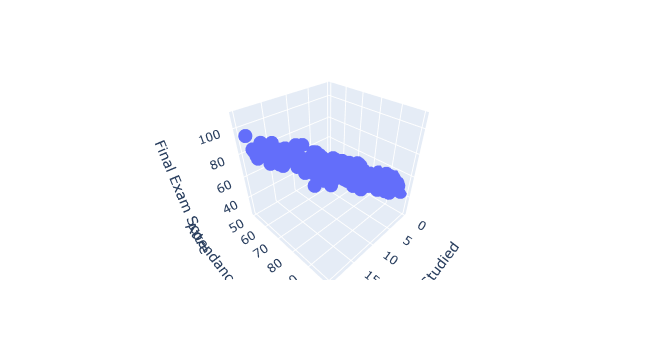

In [71]:
import plotly.express as ex
ex.scatter_3d(data, x = "Hours Studied", y = "Attendance Rate (%)", z = "Final Exam Score")

In [49]:
x = data.iloc[:, 0:2]
y = data.iloc[:, -1]

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [51]:
x_train.shape

(200, 2)

In [52]:
y_test.shape

(50,)

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [54]:
model.fit(x_train, y_train)

LinearRegression()

In [61]:
y_pred = model.predict(x_test)

In [56]:
# y = b1x1 + b2x2 + b0
b0 = model.intercept_
b0

5.091332211983328

In [57]:
b1b2 = model.coef_
b1b2
b1 = b1b2[0]
b2 = b1b2[1]
print(b1)
print(b2)

2.9073206910357325
0.4473428208382591


In [58]:
x_test.head(2)

,Hours Studied,Attendance Rate (%)
142,14.380918,54.119052
6,4.492096,89.317251


In [59]:
y_test.head(2)

142    63.254418
6      58.324932
Name: Final Exam Score, dtype: float64

In [60]:
# y = b1x1 + b2x2 + b0
y = (2.9073206910357325*9.597512) + (0.4473428208382591*66.972510) + 5.091332211983328
y

62.95404897406558

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9384060206712896

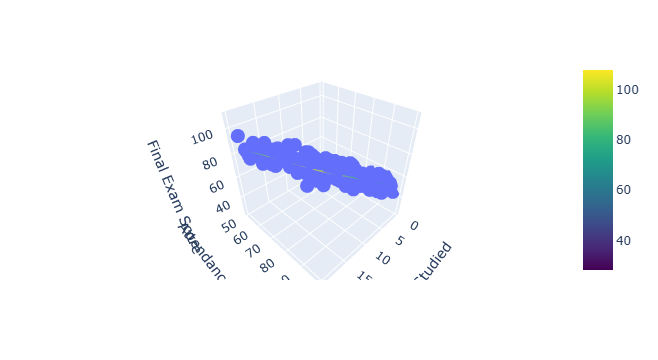

In [75]:

x_values = np.linspace(data['Hours Studied'].min(),
                       data['Hours Studied'].max(), 10)
y_values = np.linspace(data['Attendance Rate (%)'].min(),
                       data['Attendance Rate (%)'].max(), 10)
xGrid, yGrid = np.meshgrid(x_values, y_values)


final = pd.DataFrame({
    "Hours Studied": xGrid.ravel(),
    "Attendance Rate (%)": yGrid.ravel()
})
z_final = model.predict(final).reshape(10, 10)
fig = px.scatter_3d(data, x='Hours Studied', 
                    y='Attendance Rate (%)', z='Final Exam Score')
fig.add_trace(go.Surface(x=x_values, y=y_values, z=z_final, 
                         colorscale="Viridis", opacity=0.6))

fig.show()